In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv("C:/Users/tyler/Documents/DeepLearningAssignments/FinalProject/Student_performance_data _.csv")

In [12]:
dataset

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1


In [4]:
# Turning GradeClass into int
dataset['GradeClass'] = dataset['GradeClass'].map(lambda x: int(x))

In [5]:
# Separating into feature set and label set
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -1].values

In [6]:
# Separating into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

First model is a KNN used to classify the data into the 5 distinct average grades.

Text(0, 0.5, 'Accuracy Score')

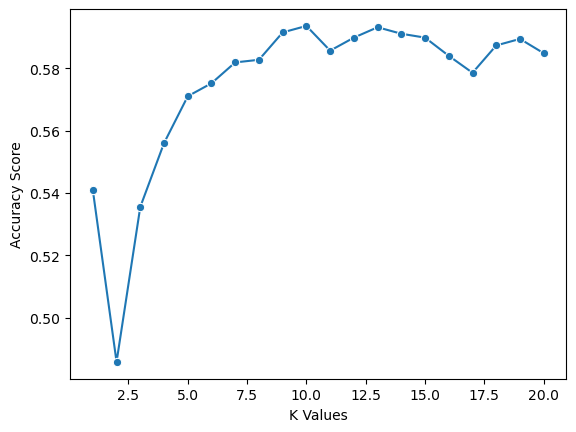

In [7]:
# Using cross-validation to split the dataset with various test/train combinations in order to find the optimal value for k
# Visualizing the average accuracy score with values of k ranging from 1-20

k_values = [i for i in range (1,21, 1)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [8]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [9]:
y_pred = knn.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5719063545150501


y_pred are my predicted class labels from the KNN model.  y_test are the actual labels.  My KNN model was 57.19% accurate, which is somewhat impressive considering the potential unpredictability of something like class grades.  Below I will train an artificial neural network to see how much more accurate I can get my model.  The data has already been split into X_train and X_test.

In [66]:
# Normalizing data
# Used the same X_train and X_test splits as the KNN model
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
# Building tensorflow model with 5 layers, batch size of 16, and 120 epochs
# Dataset was not too large so I could this amount of computation complexity

model = tf.keras.models.Sequential()

In [75]:
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [76]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [77]:
history = model.fit(X_train, y_train, batch_size = 16, epochs = 120)

Epoch 1/120
113/113 [==============================] - 1s 4ms/step - loss: 1.3358 - accuracy: 0.4437
Epoch 2/120
113/113 [==============================] - 0s 4ms/step - loss: 0.9858 - accuracy: 0.5936
Epoch 3/120
113/113 [==============================] - 0s 4ms/step - loss: 0.8636 - accuracy: 0.6566
Epoch 4/120
113/113 [==============================] - 0s 4ms/step - loss: 0.7880 - accuracy: 0.6962
Epoch 5/120
113/113 [==============================] - 0s 4ms/step - loss: 0.7137 - accuracy: 0.7352
Epoch 6/120
113/113 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.7664
Epoch 7/120
113/113 [==============================] - 0s 4ms/step - loss: 0.6158 - accuracy: 0.7726
Epoch 8/120
113/113 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.7904
Epoch 9/120
113/113 [==============================] - 0s 3ms/step - loss: 0.5537 - accuracy: 0.7848
Epoch 10/120
113/113 [==============================] - 0s 3ms/step - loss: 0.5346 - accura

After 120 epochs I achieved a final accuracy of 99.55%, which is incredibly high, especially considering how hard it may be to predict grades from other metrics like study habits, parental support, etc.  This is much better than the KNN accuracy of 57%.  This shows that for a dataset with this level of unpredictability and this many factors, a supervised deep learning model is better suited for classification tasks.

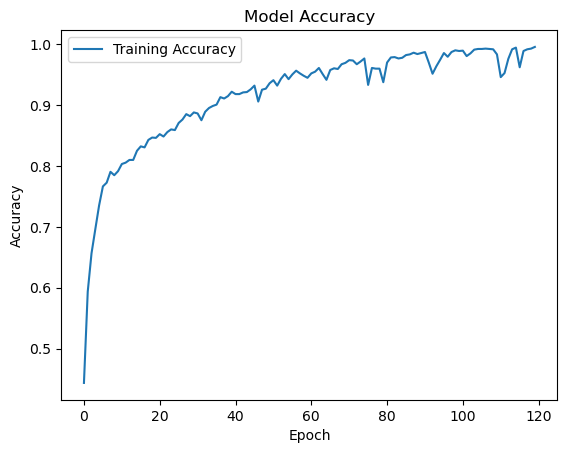

In [78]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()